In [1]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [18]:
from keras.datasets import boston_housing
 
(X_train, y_train),(X_test, y_test) = boston_housing.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [4]:
print(X_train[:10],'\n',y_train[:10])

[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]
 [2.83920e-01 0.00000e+00 7.38000e+00 0.00000e+00 4.93000e-01 5.70800e+00
  7.43000e+01 4.72110e+00 5.00000e+00 2.87000e+02 1.96000e+01 3.91130e+02
  1.17400e+01]
 [9.18702e+00 0.00000e

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = X_train - mean
X_train = X_train / std

In [20]:
X_test = X_test - mean
X_test = X_test / std

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

In [22]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(65, activation = 'relu', input_shape=(13,)))
model.add(layers.Dense(35, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 65)                910       
_________________________________________________________________
dense_4 (Dense)              (None, 35)                2310      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 36        
Total params: 3,256
Trainable params: 3,256
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
Hist = model.fit(X_train, y_train, epochs=500, batch_size=1, validation_data=(X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 9.8016 - mae: 2.1329 - val_loss: 11.0091 - val_mae: 2.2572
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 6.9795 - mae: 1.9965 - val_loss: 11.6466 - val_mae: 2.6577
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 6.3481 - mae: 1.8896 - val_loss: 10.4823 - val_mae: 2.2387
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 7.7837 - mae: 2.0711 - val_loss: 11.8060 - val_mae: 2.3142
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 7.0676 - mae: 1.9875 - val_loss: 10.7700 - val_mae: 2.2978
Epoch 6/500
323/323 [==============================] - 0s 1ms/step - loss: 7.4631 - mae: 2.0133 - val_loss: 10.6557 - val_mae: 2.2253
Epoch 7/500
323/323 [==============================] - 0s 1ms/step - loss: 6.3195 - mae: 1.8303 - val_loss: 11.4391 - val_mae: 2.2389
Epoch 8/500
323/323 [==============================] - 0s 1ms/

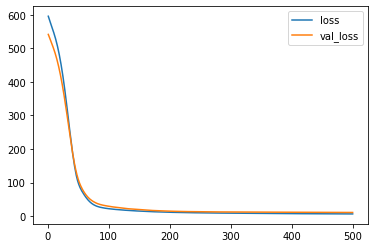

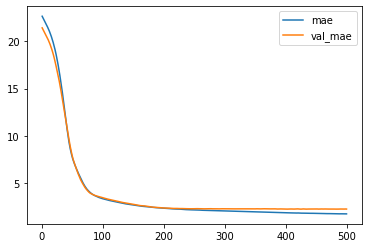

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(epochs, Hist.history['mae'])
plt.plot(epochs, Hist.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()

In [27]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
test_mse_score, test_mae_score

4/4 [==============================] - 0s 3ms/step - loss: 19.0327 - mae: 2.7464


(19.03273582458496, 2.7464263439178467)

In [25]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
test_mse_score, test_mae_score

4/4 [==============================] - 0s 3ms/step - loss: 20.9809 - mae: 2.8144


(20.98088836669922, 2.814417600631714)

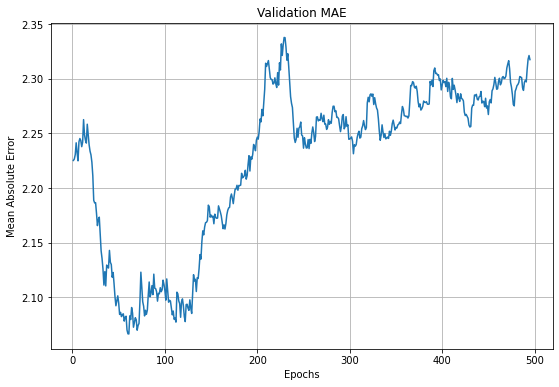

In [31]:
def smooth_curve(points, factor = 0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist.history['val_mae']
mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [32]:
from keras import backend as K
K.clear_session()

In [36]:

model = models.Sequential(name = 'EarlyStopping')
model.add(layers.Dense(65, activation='relu', input_shape=(13,)))
model.add(layers.Dense(35, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [38]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae', mode='min', patience=100, verbose=1)

from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5', monitor='val_mae', mode='min', save_best_only=True, verbose=1)

In [41]:
%%time
Hist = model.fit(X_train, y_train, epochs=500, batch_size=200, 
                 callbacks=[es,mc], verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/500
2/2 [==============================] - 0s 100ms/step - loss: 17.3011 - mae: 3.0012 - val_loss: 25.2014 - val_mae: 3.8115

Epoch 00001: val_mae improved from inf to 3.81153, saving model to best_boston.h5
Epoch 2/500
2/2 [==============================] - 0s 98ms/step - loss: 17.1972 - mae: 2.9924 - val_loss: 25.1160 - val_mae: 3.8028

Epoch 00002: val_mae improved from 3.81153 to 3.80280, saving model to best_boston.h5
Epoch 3/500
2/2 [==============================] - 0s 105ms/step - loss: 17.1081 - mae: 2.9850 - val_loss: 25.0254 - val_mae: 3.7937

Epoch 00003: val_mae improved from 3.80280 to 3.79369, saving model to best_boston.h5
Epoch 4/500
2/2 [==============================] - 0s 98ms/step - loss: 17.0154 - mae: 2.9764 - val_loss: 24.9444 - val_mae: 3.7848

Epoch 00004: val_mae improved from 3.79369 to 3.78484, saving model to best_boston.h5
Epoch 5/500
2/2 [==============================] - 0s 95ms/step - loss: 16.9197 - mae: 2.9672 - val_loss: 24.8460 - val_mae: 3

In [42]:
!ls -l

total 76
-rw-r--r-- 1 root root 70736 Mar 28 13:13 best_boston.h5
drwxr-xr-x 1 root root  4096 Mar 18 13:36 sample_data


In [45]:
mse, mae = model.evaluate(X_test, y_test)
mse, mae

4/4 [==============================] - 0s 2ms/step - loss: 19.1488 - mae: 2.8044


(19.148832321166992, 2.8043906688690186)

In [47]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
from keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/best_boston.h5')

loss, accuracy = model_google.evaluate(X_test, y_test)
loss, accuracy

4/4 [==============================] - 0s 3ms/step - loss: 19.1404 - mae: 2.7941


(19.140417098999023, 2.794105291366577)